# Import Libraries and Dataset


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV # Hyperparameter
from sklearn.model_selection import GridSearchCV
# model training and hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
import joblib

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cardio.csv')

# Data Exploration

In [ ]:
# Check the number of rows and columns
dataset.shape

(70000, 13)

In [ ]:
# Check the data types of each column
dataset.dtypes

,0
id,int64
age,int64
gender,int64
height,int64
weight,float64
ap_hi,int64
ap_lo,int64
cholesterol,int64
gluc,int64
smoke,int64


In [ ]:
# Display the first few rows
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# to display sample statistics such as min, max, mean, std for each attribute
dataset.describe().round(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.0,70000.0
mean,49972.42,19468.87,1.35,164.36,74.21,128.82,96.63,1.37,1.23,0.09,0.05,0.8,0.5
std,28851.30,2467.25,0.48,8.21,14.40,154.01,188.47,0.68,0.57,0.28,0.23,0.4,0.5
min,0.00,10798.00,1.00,55.00,10.00,-150.00,-70.00,1.00,1.00,0.00,0.00,0.0,0.0
25%,25006.75,17664.00,1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0
50%,50001.50,19703.00,1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0
75%,74889.25,21327.00,2.00,170.00,82.00,140.00,90.00,2.00,1.00,0.00,0.00,1.0,1.0
max,99999.00,23713.00,2.00,250.00,200.00,16020.00,11000.00,3.00,3.00,1.00,1.00,1.0,1.0


In [ ]:
# Check for duplicate rows
dataset.duplicated().sum()

0

In [ ]:
# Check missing values
dataset.isnull().values.any()

False

# Data Cleaning and Pre-processing

**Drop the 'id' column**

In [ ]:
dataset.drop(columns=['id'], inplace=True)

**Convert age from days to years**

In [ ]:
dataset['age'] = (dataset['age'] / 365).astype('int64')
dataset.describe().round(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.0,70000.0
mean,52.84,1.35,164.36,74.21,128.82,96.63,1.37,1.23,0.09,0.05,0.8,0.5
std,6.77,0.48,8.21,14.40,154.01,188.47,0.68,0.57,0.28,0.23,0.4,0.5
min,29.00,1.00,55.00,10.00,-150.00,-70.00,1.00,1.00,0.00,0.00,0.0,0.0
25%,48.00,1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0
50%,53.00,1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0
75%,58.00,2.00,170.00,82.00,140.00,90.00,2.00,1.00,0.00,0.00,1.0,1.0
max,64.00,2.00,250.00,200.00,16020.00,11000.00,3.00,3.00,1.00,1.00,1.0,1.0


**Handle Outlier for Height and Weight and calculates its BMI**

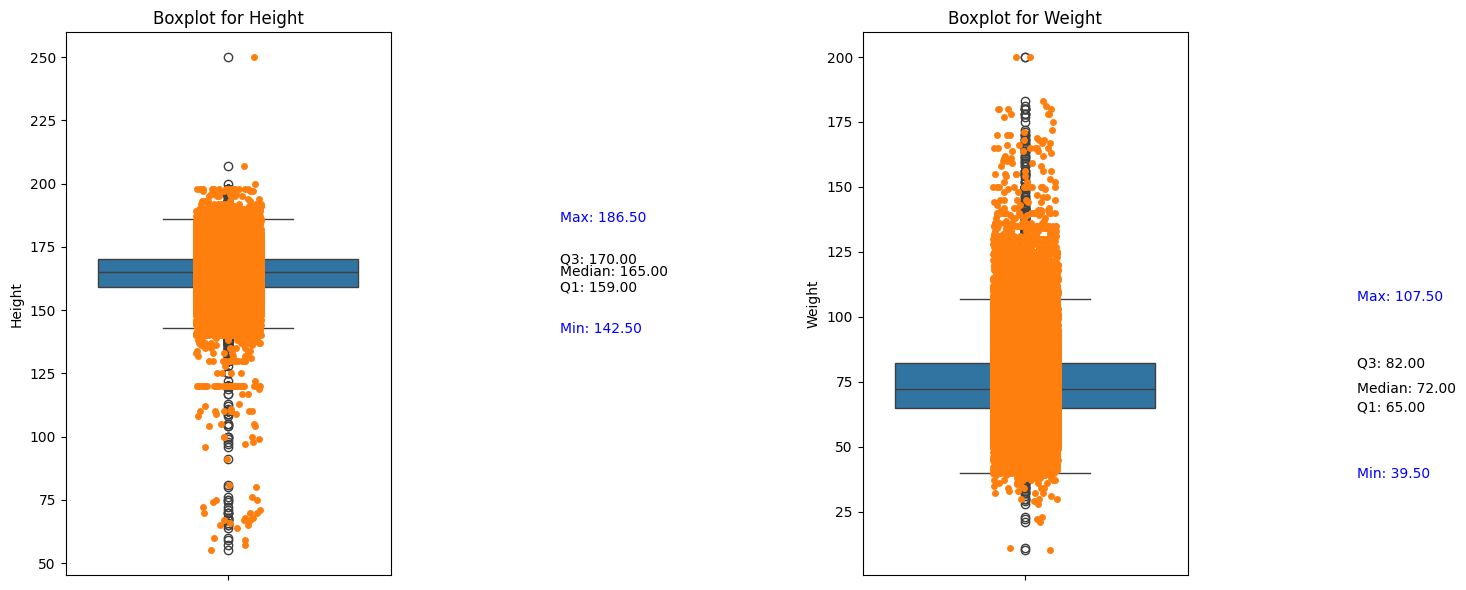

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Function to add labels
def add_labels(ax, data):
    stats = data.describe()
    q1 = stats['25%']
    median = stats['50%']
    q3 = stats['75%']
    iqr = q3 - q1
    whisker_min = q1 - 1.5 * iqr
    whisker_max = q3 + 1.5 * iqr

    ax.text(1.02, whisker_min, f"Min: {whisker_min:.2f}", verticalalignment='center', color='blue')
    ax.text(1.02, q1, f"Q1: {q1:.2f}", verticalalignment='center')
    ax.text(1.02, median, f"Median: {median:.2f}", verticalalignment='center')
    ax.text(1.02, q3, f"Q3: {q3:.2f}", verticalalignment='center')
    ax.text(1.02, whisker_max, f"Max: {whisker_max:.2f}", verticalalignment='center', color='blue')

# Boxplot for height
sns.boxplot(ax=axes[0], y=dataset['height'])
sns.stripplot(ax=axes[0], y=dataset['height'], jitter=True)
axes[0].set_title('Boxplot for Height')
axes[0].set_ylabel('Height')
add_labels(axes[0], dataset['height'])

# Boxplot for weight
sns.boxplot(ax=axes[1], y=dataset['weight'])
sns.stripplot(ax=axes[1], y=dataset['weight'], jitter=True)
axes[1].set_title('Boxplot for Weight')
axes[1].set_ylabel('Weight')
add_labels(axes[1], dataset['weight'])

# Adjust the layout
plt.tight_layout()
plt.show()


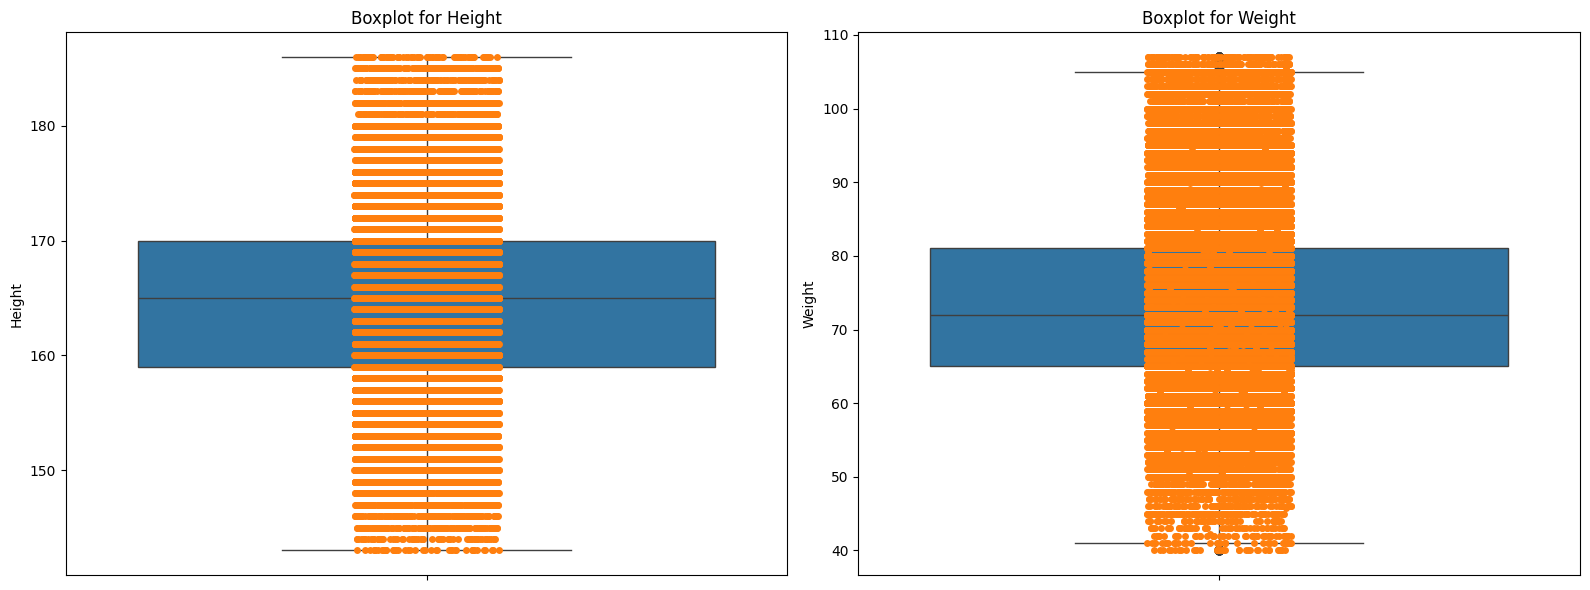

In [ ]:
# Remove outlier for height
Q1_height = dataset['height'].quantile(0.25)
Q3_height = dataset['height'].quantile(0.75)
IQR_height = Q3_height - Q1_height
dataset = dataset[~((dataset['height'] < (Q1_height - 1.5 * IQR_height)) | (dataset['height'] > (Q3_height + 1.5 * IQR_height)))]

# Remove outlier for weight
Q1_weight = dataset['weight'].quantile(0.25)
Q3_weight = dataset['weight'].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight
dataset = dataset[~((dataset['weight'] < (Q1_weight - 1.5 * IQR_weight)) | (dataset['weight'] > (Q3_weight + 1.5 * IQR_weight)))]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# Boxplot for height
sns.boxplot(ax=axes[0], y=dataset['height'])
sns.stripplot(ax=axes[0], y=dataset['height'], jitter=True)
axes[0].set_title('Boxplot for Height')
axes[0].set_ylabel('Height')

# Boxplot for weight
sns.boxplot(ax=axes[1], y=dataset['weight'])
sns.stripplot(ax=axes[1], y=dataset['weight'], jitter=True)
axes[1].set_title('Boxplot for Weight')
axes[1].set_ylabel('Weight')

# Adjust the layout
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the BMI
dataset["bmi"] = (dataset["weight"] / (dataset["height"]/100)**2).round(1)
# Drop height and weight columns after calculating BMI
dataset.drop(['height', 'weight'], axis=1, inplace=True)

**Handle Outlier for Systolic and Diastolic  blood pressure**

Diastolic  pressure is higher than systolic one in 1150 cases


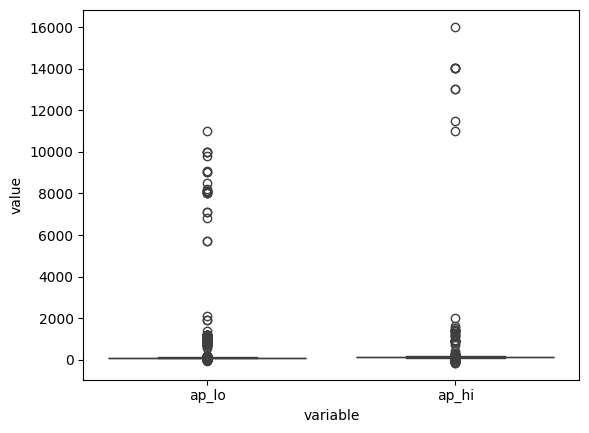

In [ ]:
# Extract columns for blood pressure
blood_pressure = dataset.loc[:,['ap_lo','ap_hi']]
# Create a boxplot for the blood pressure data
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
# Identify if the Diastolic  pressure higher than Systolic pressure. (systolic blood pressure must be greater than Diastolic)
print("Diastolic  pressure is higher than systolic one in {0} cases".format(dataset[dataset['ap_lo']> dataset['ap_hi']].shape[0]))

Diastolic  pressure is higher than systolic one in 0 cases


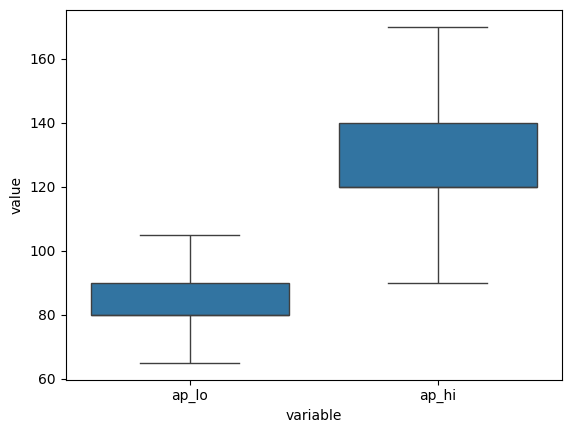

In [ ]:
# Remove outliers for systolic blood pressure
Q1_ap_hi = dataset['ap_hi'].quantile(0.25)
Q3_ap_hi = dataset['ap_hi'].quantile(0.75)
IQR_ap_hi = Q3_ap_hi - Q1_ap_hi
dataset = dataset[~((dataset['ap_hi'] < (Q1_ap_hi - 1.5 * IQR_ap_hi)) |
 (dataset['ap_hi'] > (Q3_ap_hi + 1.5 * IQR_ap_hi)))]

# Remove outliers for diastolic blood pressure
Q1_ap_lo = dataset['ap_lo'].quantile(0.25)
Q3_ap_lo = dataset['ap_lo'].quantile(0.75)
IQR_ap_lo = Q3_ap_lo - Q1_ap_lo
dataset = dataset[~((dataset['ap_lo'] < (Q1_ap_lo - 1.5 * IQR_ap_lo)) |
 (dataset['ap_lo'] > (Q3_ap_lo + 1.5 * IQR_ap_lo)))]

# Remove rows where diastolic pressure (ap_lo) is higher than systolic pressure (ap_hi)
dataset = dataset[dataset['ap_lo'] <= dataset['ap_hi']]

# Extract columns for blood pressure
blood_pressure = dataset.loc[:,['ap_lo','ap_hi']]
# Create a boxplot for the blood pressure data
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
# Identify if the Diastolic  pressure higher than Systolic pressure.
print("Diastolic  pressure is higher than systolic one in {0} cases".
      format(dataset[dataset['ap_lo']> dataset['ap_hi']].shape[0]))

In [ ]:
# Check the number of rows and columns
dataset.shape

(62503, 11)

In [ ]:
dataset.describe().round(2)

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,62503.00,62503.00,62503.00,62503.00,62503.00,62503.00,62503.00,62503.00,62503.0,62503.00,62503.00
mean,52.91,1.35,126.42,81.70,1.36,1.22,0.09,0.05,0.8,0.49,27.12
std,6.74,0.48,14.29,7.67,0.68,0.57,0.28,0.22,0.4,0.50,4.57
min,29.00,1.00,90.00,65.00,1.00,1.00,0.00,0.00,0.0,0.00,13.50
25%,48.00,1.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.00,23.90
50%,54.00,1.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.00,26.20
75%,58.00,2.00,140.00,90.00,1.00,1.00,0.00,0.00,1.0,1.00,29.80
max,64.00,2.00,170.00,105.00,3.00,3.00,1.00,1.00,1.0,1.00,50.90


# Data Visualization

**Relationship between Age and the risk of Cardiovascular Disease (cardio)**

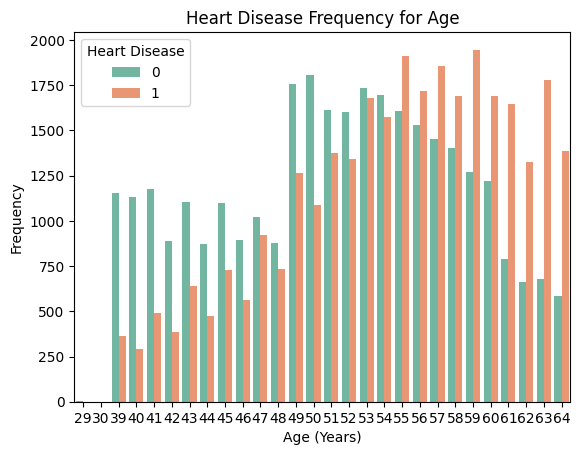

In [ ]:
# Create a Frequency plot to visualize the frequency of heart disease (cardio) across different ages
sns.countplot(x='age', hue='cardio', data = dataset, palette="Set2");
plt.title('Heart Disease Frequency for Age')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.legend(title='Heart Disease')
plt.show()


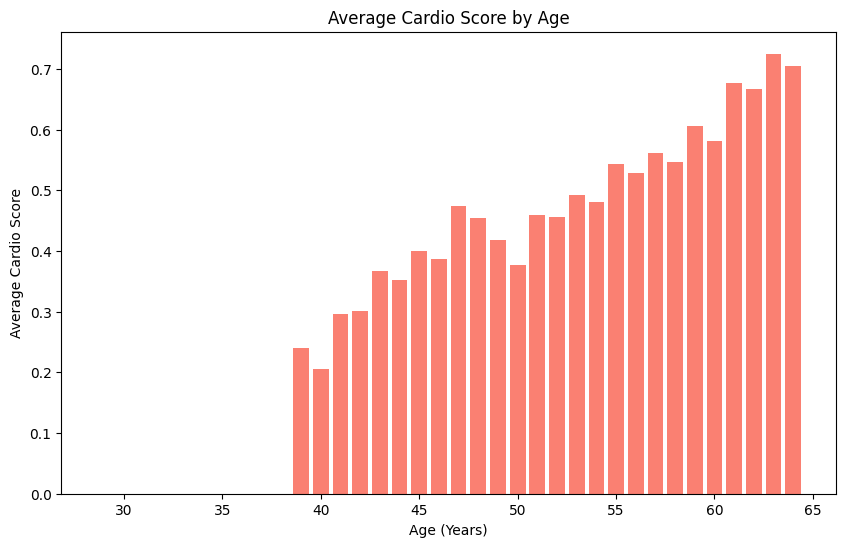

In [ ]:
# Create a bar plot to visualize the average cardio score by age

# Calculate the mean cardio score by age
mean_cardio_by_age=dataset.groupby('age')['cardio'].mean()

plt.figure(figsize=(10, 6))
plt.bar(mean_cardio_by_age.index, mean_cardio_by_age.values,color='salmon')
plt.xlabel('Age (Years)')
plt.ylabel('Average Cardio Score')
plt.title('Average Cardio Score by Age')
plt.show()

**Relationship between Gender and the risk of Cardiovascular Disease (cardio)**

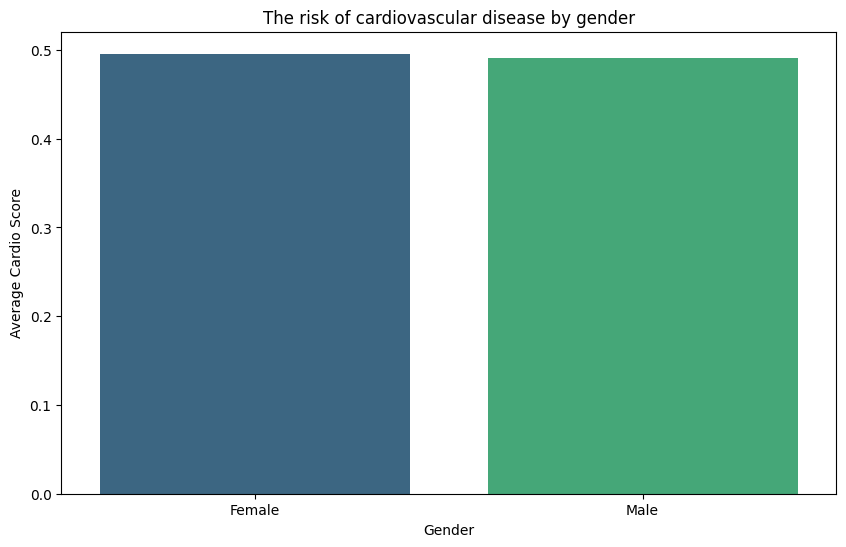

In [ ]:
gender = pd.DataFrame({
    'The Cardiac disease by average' : dataset.groupby('gender')['cardio'].mean(numeric_only=True),
    'Gender' : ['Female', 'Male']
})

# Plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Gender', y='The Cardiac disease by average', data=gender, hue='Gender', palette='viridis')

# Add title and labels
plt.title('The risk of cardiovascular disease by gender')
plt.xlabel('Gender')
plt.ylabel('Average Cardio Score')

# Add data labels

plt.show()

**Relationship between blood pressure levels and the risk of Cardiovascular Disease (cardio)**

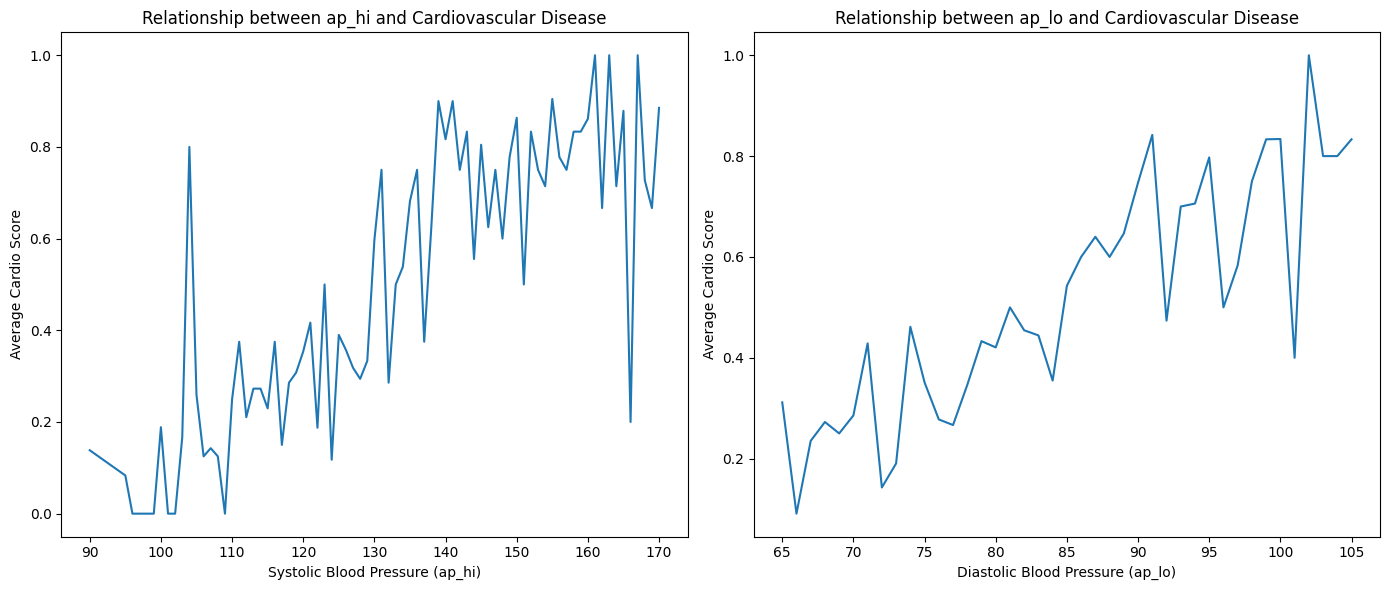

In [ ]:
# Calculate the mean cardio score by 'ap_hi'
ap_hi_mean = dataset.groupby('ap_hi')['cardio'].mean().reset_index()

# Calculate the mean cardio score by 'ap_lo'
ap_lo_mean = dataset.groupby('ap_lo')['cardio'].mean().reset_index()

plt.figure(figsize=(14, 6))
# Plotting the relationship between 'ap_hi' and 'cardio' using line graph
plt.subplot(1, 2, 1)
sns.lineplot(x='ap_hi', y='cardio', data=ap_hi_mean)
plt.title('Relationship between ap_hi and Cardiovascular Disease')
plt.xlabel('Systolic Blood Pressure (ap_hi)')
plt.ylabel('Average Cardio Score')

# Plotting the relationship between 'ap_lo' and 'cardio' using line graph
plt.subplot(1, 2, 2)
sns.lineplot(x='ap_lo', y='cardio', data=ap_lo_mean)
plt.title('Relationship between ap_lo and Cardiovascular Disease')
plt.xlabel('Diastolic Blood Pressure (ap_lo)')
plt.ylabel('Average Cardio Score')

plt.tight_layout()
plt.show()

**Relationship between BMI and the risk of Cardiovascular Disease (cardio)**

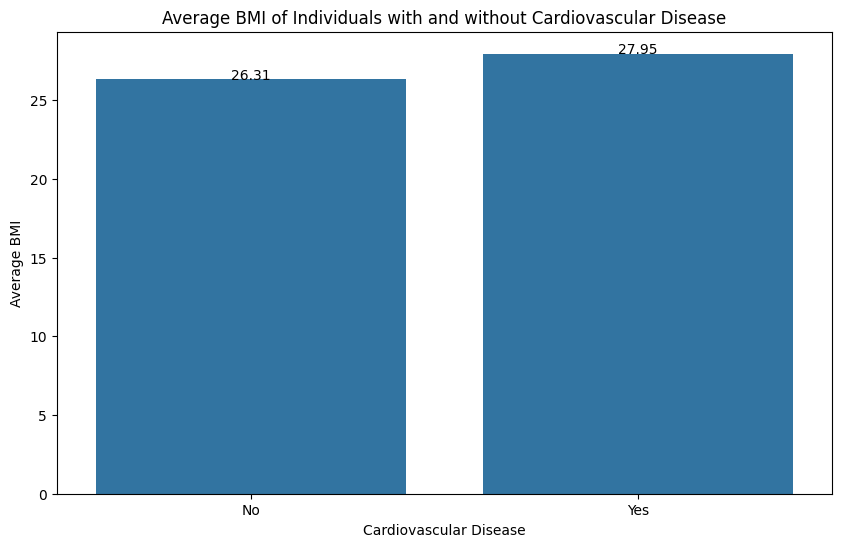

In [ ]:
# Calculate the average BMI for individuals with and without cardiovascular disease
average_bmi = dataset.groupby('cardio')['bmi'].mean().reset_index()
average_bmi['Cardiovascular Disease'] = average_bmi['cardio'].map({0: 'No', 1: 'Yes'})

# Plotting the average BMI for each group
plt.figure(figsize=(10, 6))
sns.barplot(x='Cardiovascular Disease', y='bmi', data=average_bmi)

# Add title and labels
plt.title('Average BMI of Individuals with and without Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Average BMI')

# Add data labels
for index, row in average_bmi.iterrows():
    plt.text(index, row['bmi'], round(row['bmi'], 2), color='black', ha="center")

plt.show()

**Relationship between the risk of Cardiovascular Disease (cardio) and other factors (Cholesterol Level, Glucose Level, Smokeing Status, Alcohol Intake, Physical Activity)**

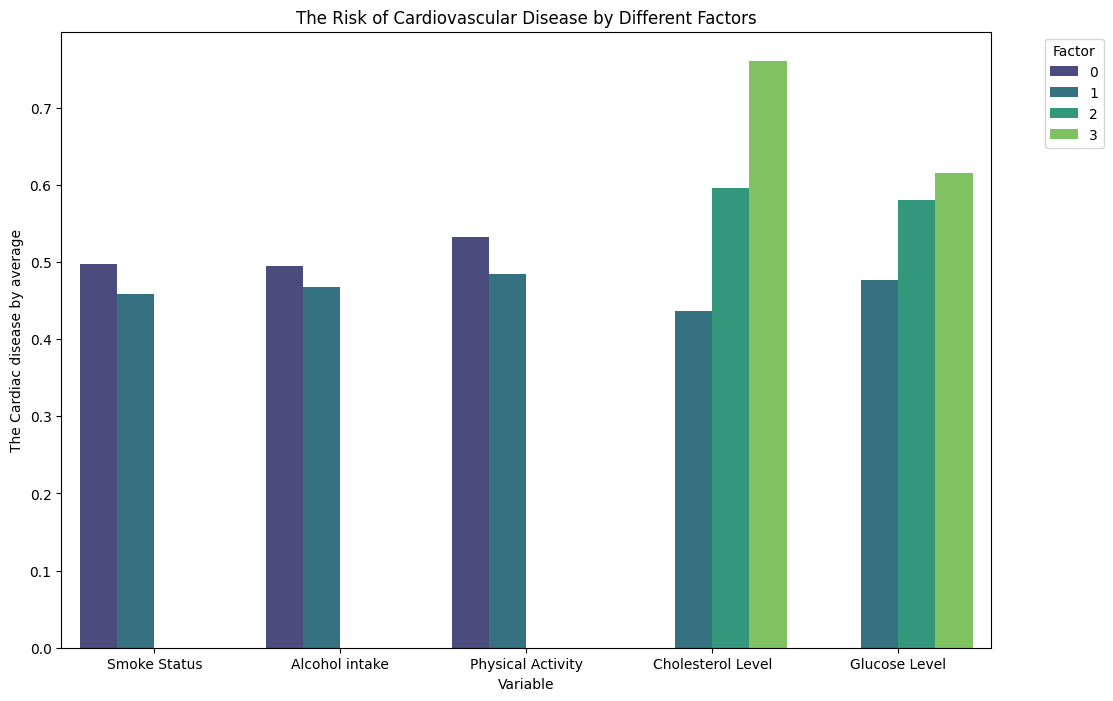

In [ ]:
# Prepare the data
chol = pd.DataFrame({
    'cardiac_avg' : dataset.groupby('cholesterol')['cardio'].mean(numeric_only=True),
    'value': ['1', '2', '3'],
    'variable' : 'Cholesterol Level'
})

gluc = pd.DataFrame({
    'cardiac_avg': dataset.groupby('gluc')['cardio'].mean(),
    'value': ['1', '2', '3'],
    'variable' : 'Glucose Level'
})

smoke_cardio = pd.DataFrame({
    'cardiac_avg': dataset.groupby('smoke')['cardio'].mean(),
    'value': ['0', '1'],
    'variable' : 'Smoke Status'
})

alco_cardio = pd.DataFrame({
    'cardiac_avg': dataset.groupby('alco')['cardio'].mean(),
    'value': ['0', '1'],
    'variable' : 'Alcohol intake'
})

activity_cardio = pd.DataFrame({
    'cardiac_avg': dataset.groupby('active')['cardio'].mean(),
    'value': ['0', '1'],
    'variable' : 'Physical Activity'
})

# Combine all dataframes
combined_data = pd.concat([
    smoke_cardio,
    alco_cardio,
    activity_cardio,
    chol,
    gluc

])

# Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='variable', y='cardiac_avg', hue='value', data=combined_data, palette='viridis')

# Add title and labels
plt.title('The Risk of Cardiovascular Disease by Different Factors')
plt.xlabel('Variable')
plt.ylabel('The Cardiac disease by average')

plt.legend(title='Factor', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


cardio
0    31634
1    30869
Name: count, dtype: int64


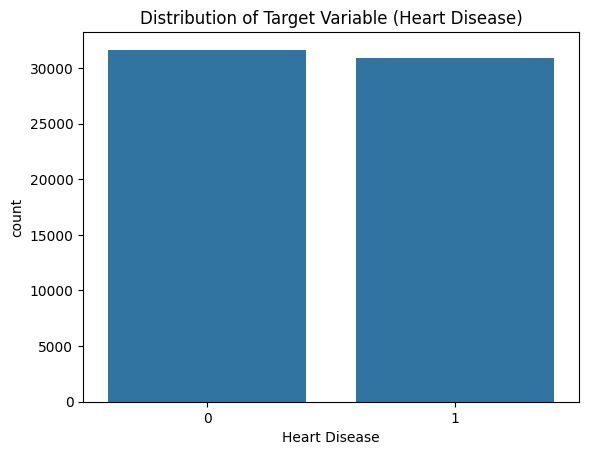

In [ ]:
# Visualize target variable distribution
print(dataset["cardio"].value_counts())

sns.countplot(x='cardio', data=dataset)
plt.title('Distribution of Target Variable (Heart Disease)')
plt.xlabel('Heart Disease')
plt.show()
# # We found that the data is imbalanced, need perform balancing technique

**Correation Matrix**

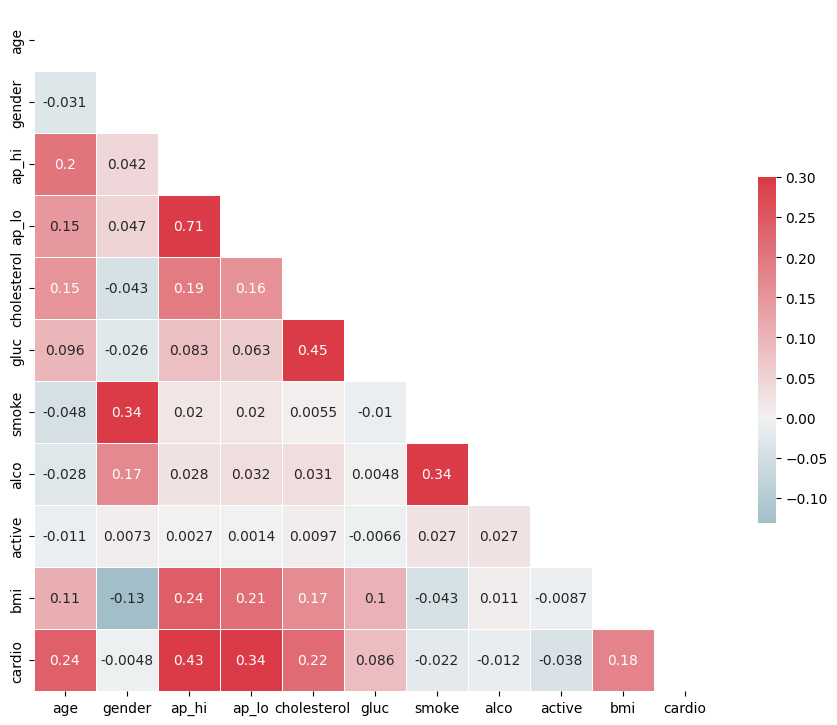

In [ ]:
# Move 'cardio' to the last column
cols = list(dataset.columns)
cols.append(cols.pop(cols.index('cardio')))
dataset = dataset[cols]

# Calculate the correlation matrix
corr = dataset.corr()
# Create a diverging palette
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# As we can see age and cholesterol have significant impact, but not very high correlated with target class.
# ap_hi (systolic blood pressure) and ap_lo (diastolic blood pressure): The correlation is very high (0.71). This makes sense physiologically as both are measures of blood pressure and usually rise and fall together.
# gluc (glucose) and cholesterol: There is a moderate positive correlation (0.45). Elevated levels of glucose and cholesterol often occur together as part of metabolic syndrome.


# Feature Selection

In [ ]:
dataset.drop('gender', axis =1, inplace=True)

In [ ]:
# Check for duplicate rows
dataset.duplicated().sum()

12355

In [ ]:
dataset = dataset.drop_duplicates()
num_duplicates_after = dataset.duplicated().sum()
print(f"Number of duplicate rows after removal: {num_duplicates_after}")

Number of duplicate rows after removal: 0


In [ ]:
# Check the number of rows and columns
dataset.shape

(50148, 10)

# Data Modelling


**Setting IV & TV**

In [ ]:
x = dataset.drop('cardio', axis = 1)
y = dataset['cardio']

**Normalization**

In [ ]:
# Columns to be normalized
columns_to_normalize = ['age', 'ap_hi', 'ap_lo', 'bmi']

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler only to the selected columns
x[columns_to_normalize] = scaler.fit_transform(x[columns_to_normalize])

**Data Splitting**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Length of train set: ", x_train.shape, "y:", y_train.shape)
print("Length of test set: ", x_train.shape, "y:", y_test.shape)

Length of train set:  (40118, 9) y: (40118,)
Length of test set:  (40118, 9) y: (10030,)


**Balancing (Undersampling)**

cardio
0    18521
1    18521
Name: count, dtype: int64


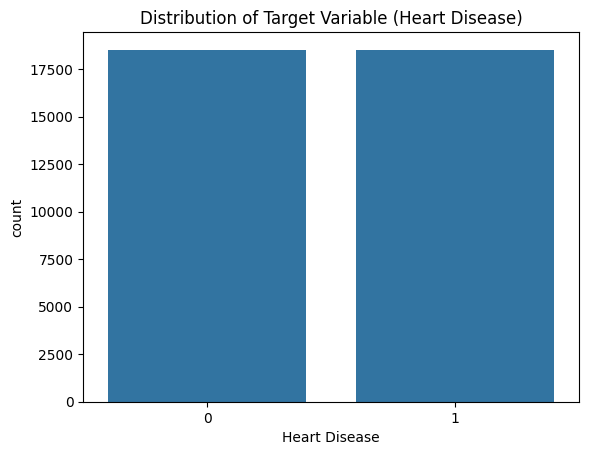

In [ ]:
rus = RandomUnderSampler(random_state=42)
x_train_res, y_train_res = rus.fit_resample(x_train, y_train)

# Visualize target variable distribution again
print(y_train_res.value_counts())

sns.countplot(x=y_train_res)
plt.title('Distribution of Target Variable (Heart Disease)')
plt.xlabel('Heart Disease')
plt.show()

# Random Forest


In [ ]:
# Define the model
rfc = RandomForestClassifier()

# n_estimators :> No of Decision Trees to be used
# max_depth :> Depth of Each Tree
# criterion :> Measure the quality of a split

# Define the parameter grid
param_grid = {
    'max_depth': [10, 20],
    'min_samples_leaf': [2, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'n_estimators': [300, 400]
    }

# Initialize the GridSearchCV
rfc_gridcv  = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5,  n_jobs=-1)

# Fit the model
rfc_gridcv.fit(x_train_res, y_train_res)

# Get the best estimator from the GridSearchCV
best_rf = rfc_gridcv.best_estimator_

# Evaluate the model
print("Best Hyper Parameters:\n", rfc_gridcv.best_params_)
acc_random_forest_train = round(best_rf.score(x_train_res, y_train_res) * 100, 2)
acc_random_forest_test = round(best_rf.score(x_test, y_test) * 100, 2)

print(f"Training accuracy: {acc_random_forest_train}%")
print(f"Test accuracy: {acc_random_forest_test}%")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyper Parameters:
 {'max_depth': 10, 'n_estimators': 200}
Training accuracy: 72.95%
Test accuracy: 70.38%


In [ ]:
# Define the model with the best hyperparameters
best_rf = RandomForestClassifier(
    max_depth=10,
    max_features='log2',
    min_samples_leaf=20,
    min_samples_split=20,
    n_estimators=200
)
# 71.44%

# Fit the model on the training data
best_rf.fit(x_train_res, y_train_res)

# Evaluate the model on the test data
# Compare training accuracy (acc_random_forest_train) with test accuracy (acc_random_forest_test). A large difference may indicate overfitting.
# Evaluate the model
acc_random_forest_train = round(best_rf.score(x_train_res, y_train_res) * 100, 2)
acc_random_forest_test = round(best_rf.score(x_test, y_test) * 100, 2)

print(f"Training accuracy: {acc_random_forest_train}%")
print(f"Test accuracy: {acc_random_forest_test}%")

Training accuracy: 72.64%
Test accuracy: 71.53%


Accuracy: 0.72
Precision: 0.78
Recall: 0.66
F1 Score: 0.72
ROC-AUC: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.78      0.71      4579
           1       0.78      0.66      0.72      5451

    accuracy                           0.72     10030
   macro avg       0.72      0.72      0.72     10030
weighted avg       0.73      0.72      0.72     10030



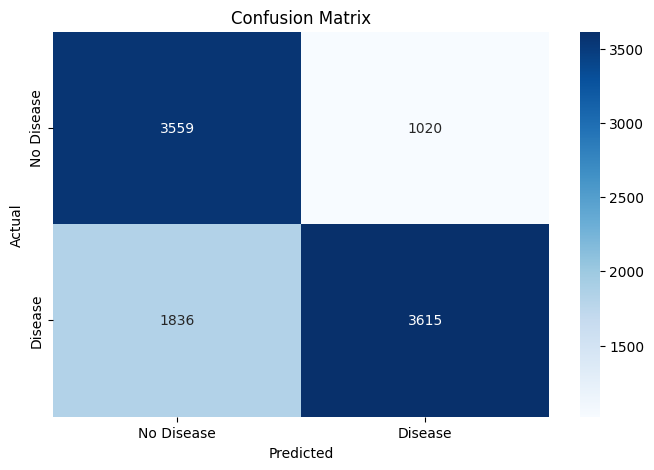

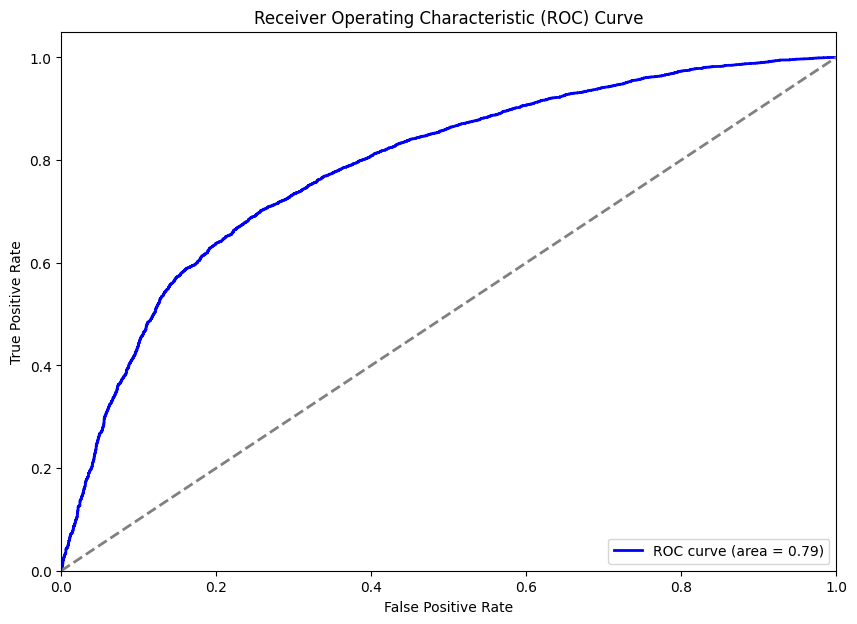

In [ ]:
# Predict on the test set
y_pred = best_rf.predict(x_test)
y_proba = best_rf.predict_proba(x_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:

# Save the model
joblib.dump(best_rf, 'best_random_forest_model.pkl')


['best_random_forest_model.pkl']

# XGB Classifier

In [ ]:
from xgboost import XGBClassifier
# Define the XGBoost model
xgb = XGBClassifier()

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.3, 0.7]
}

# Initialize the GridSearchCV
xgb_gridcv = GridSearchCV(estimator=xgb, param_grid=param_grid,cv=5, n_jobs=-1, verbose=2)

# Fit the model
xgb_gridcv.fit(x_train_res, y_train_res)

# Get the best estimator from the GridSearchCV
best_xgb = xgb_gridcv.best_estimator_

# Evaluate the model
print("Best Hyper Parameters:\n", xgb_gridcv.best_params_)
acc_xgb_train = round(best_xgb.score(x_train_res, y_train_res) * 100, 2)
acc_xgb_test = round(best_xgb.score(x_test, y_test) * 100, 2)

print(f"Training accuracy: {acc_xgb_train}%")
print(f"Test accuracy: {acc_xgb_test}%")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyper Parameters:
 {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}
Training accuracy: 72.34%
Test accuracy: 71.42%


In [ ]:
from xgboost import XGBClassifier
# Define the model with the best hyperparameters
best_xgb = XGBClassifier(
    max_depth=10,
    learning_rate=0.01,
    n_estimators=350,
    colsample_bytree=0.7,
    reg_lambda=10.0,
    reg_alpha=0.1,
    subsample=0.9,
)
# 71.44%

# Fit the model on the training data
best_xgb.fit(x_train_res, y_train_res)

# Evaluate the model on the test data
# Compare training accuracy (acc_random_forest_train) with test accuracy (acc_random_forest_test). A large difference may indicate overfitting.
# Evaluate the model
acc_xgb_train = round(best_xgb.score(x_train_res, y_train_res) * 100, 2)
acc_xgb_test = round(best_xgb.score(x_test, y_test) * 100, 2)

print(f"Training accuracy: {acc_xgb_train}%")
print(f"Test accuracy: {acc_xgb_test}%")

Training accuracy: 73.76%
Test accuracy: 71.5%


Accuracy: 0.71
Precision: 0.77
Recall: 0.67
F1 Score: 0.72
ROC-AUC: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.76      0.71      4579
           1       0.77      0.67      0.72      5451

    accuracy                           0.71     10030
   macro avg       0.72      0.72      0.71     10030
weighted avg       0.72      0.71      0.72     10030



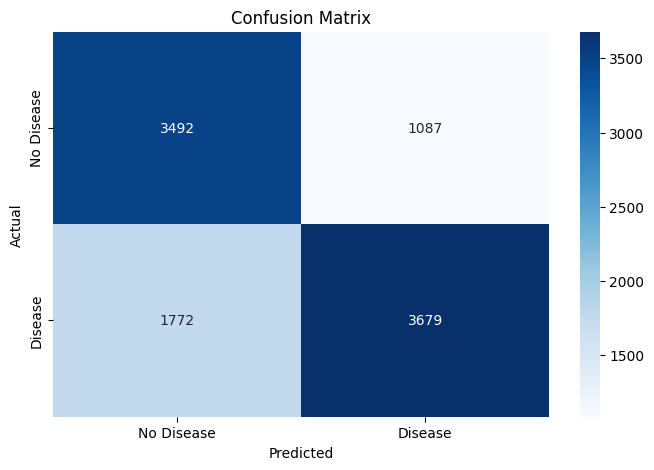

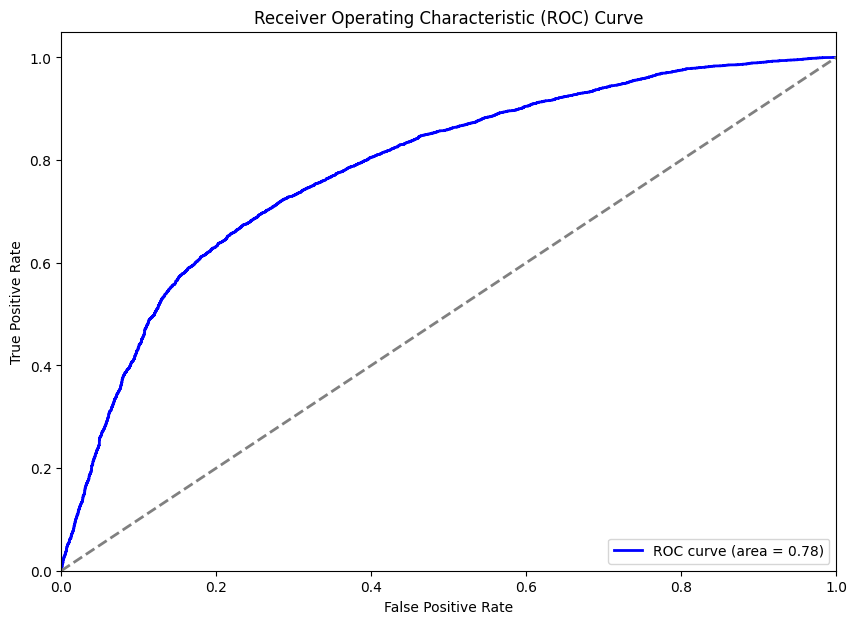

In [ ]:
# Predict on the test set
y_pred = best_xgb.predict(x_test)
y_proba = best_xgb.predict_proba(x_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Save as binary model
best_xgb.save_model('best_xgb_model.model')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:16:53] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [ ]:
import joblib

# Save the model
joblib.dump(best_xgb, 'best_xgb_model.pkl')


['best_xgb_model.pkl']

# ANN


In [ ]:
import keras # library for neural network. Need tensorflow to installed before performing this installation.
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
# from keras.utils import np_utils

In [ ]:
classifier = Sequential()
# if there is more than 1 hidden layer, then it is considered as DNN

# Adding the input layer and the first hidden layer
# Specifically, the number of neurons comprising that layer is equal to the number of features (columns) in your data.
classifier.add(Dense(units= 300, kernel_initializer = 'uniform', activation = 'relu', input_dim = 9))
classifier.add(Dropout(0.2))

# Adding the second hidden layer
classifier.add(Dense(units = 200, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.2))

# Adding the output layer
# If the NN is a classifier, then it also has a single node unless softmax is used in which case the output layer has one node per class label in your model.
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) # Sigmoid due to binary classification # softmax for multiclassfier.....
classifier.add(Dropout(0.2))

# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# batch size must be 2 power of n, so it can be 2, 4, 8, 16, 32, but mostly used is 16 and 32
# Fitting the model
history = classifier.fit(x_train_res, y_train_res, validation_data=(x_test, y_test), batch_size = 32, epochs = 100)

classifier.summary()

Epoch 1/100
1158/1158 [==============================] - 12s 8ms/step - loss: 2.0645 - accuracy: 0.6620 - val_loss: 0.6221 - val_accuracy: 0.6858
Epoch 2/100
1158/1158 [==============================] - 7s 6ms/step - loss: 2.0128 - accuracy: 0.6686 - val_loss: 0.6251 - val_accuracy: 0.6836
Epoch 3/100
1158/1158 [==============================] - 6s 6ms/step - loss: 2.0010 - accuracy: 0.6712 - val_loss: 0.6154 - val_accuracy: 0.6900
Epoch 4/100
1158/1158 [==============================] - 7s 6ms/step - loss: 2.0117 - accuracy: 0.6726 - val_loss: 0.6105 - val_accuracy: 0.6938
Epoch 5/100
1158/1158 [==============================] - 5s 4ms/step - loss: 2.0153 - accuracy: 0.6723 - val_loss: 0.6082 - val_accuracy: 0.6886
Epoch 6/100
1158/1158 [==============================] - 5s 4ms/step - loss: 1.9326 - accuracy: 0.6767 - val_loss: 0.6273 - val_accuracy: 0.6819
Epoch 7/100
1158/1158 [==============================] - 7s 6ms/step - loss: 2.0103 - accuracy: 0.6709 - val_loss: 0.5999 - val_a

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)
y_pred

314/314 [==============================] - 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix: \n", cm)
print("\nclassification_report: \n", classification_report(y_test, y_pred))

Accuracy:  0.6964107676969092

Confusion Matrix: 
 [[3845  734]
 [2311 3140]]

classification_report: 
               precision    recall  f1-score   support

           0       0.62      0.84      0.72      4579
           1       0.81      0.58      0.67      5451

    accuracy                           0.70     10030
   macro avg       0.72      0.71      0.69     10030
weighted avg       0.73      0.70      0.69     10030



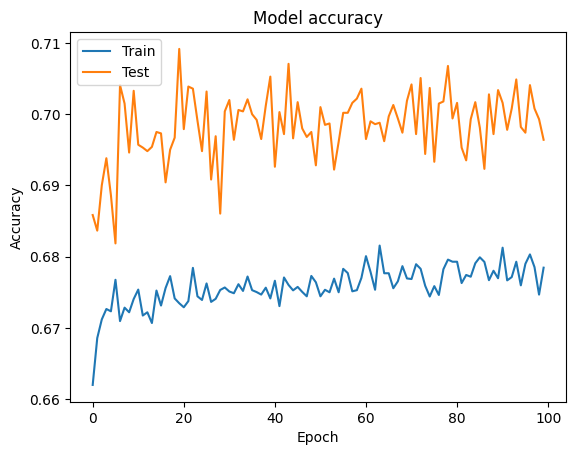

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.1 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

def build_model(hp):
  model = Sequential()
  hp_units = hp.Int('HL', min_value=70, max_value=400, step=1)
  model.add(Dense(units = hp_units, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  hp_epochs = hp.Int('Epochs', min_value=5, max_value=100, step=1)
  hp_batch = hp.Choice('Batch Size', [8, 16, 32, 64, 128])
  hp_optimizers = hp.Choice('Optimizer', ['sgd', 'adam', 'rmsprop'])

  model.compile(optimizer = hp_optimizers, loss='binary_crossentropy', metrics = ['accuracy'])
  return model

tuner = kt.RandomSearch(build_model, objective = 'val_accuracy', max_trials = 5)

tuner.search(x_train_res, y_train_res, epochs = 100, validation_data = (x_test, y_test))

Trial 5 Complete [00h 06m 23s]
val_accuracy: 0.7186440825462341

Best val_accuracy So Far: 0.7208374738693237
Total elapsed time: 00h 32m 06s


In [ ]:
for h_param in [f"HL" for i in range(1)] + [f"Epochs" for i in range(1)] + ['Batch Size'] + ['Optimizer']:
  print(h_param, tuner.get_best_hyperparameters()[0].get(h_param))

HL 236
Epochs 24
Batch Size 8
Optimizer adam


In [ ]:
tuner.results_summary(num_trials=10)

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
HL: 236
Epochs: 24
Batch Size: 8
Optimizer: adam
Score: 0.7208374738693237

Trial 3 summary
Hyperparameters:
HL: 377
Epochs: 59
Batch Size: 16
Optimizer: sgd
Score: 0.7200399041175842

Trial 1 summary
Hyperparameters:
HL: 127
Epochs: 92
Batch Size: 64
Optimizer: rmsprop
Score: 0.7198404669761658

Trial 0 summary
Hyperparameters:
HL: 358
Epochs: 95
Batch Size: 8
Optimizer: adam
Score: 0.7197407484054565

Trial 4 summary
Hyperparameters:
HL: 342
Epochs: 69
Batch Size: 32
Optimizer: rmsprop
Score: 0.7186440825462341


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
best_model.build(x_train_res.shape)

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (37042, 236)              2360      
                                                                 
 dense_1 (Dense)             (37042, 1)                237       
                                                                 
Total params: 2597 (10.14 KB)
Trainable params: 2597 (10.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# model checkpoint
from keras.callbacks import ModelCheckpoint
file = 'Best_Model.hdf5'
checkpoint = ModelCheckpoint (file, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')
callbacks_list = [checkpoint]

history = best_model.fit(x_train_res, y_train_res, epochs = 100, batch_size = 32, validation_data = (x_test, y_test), callbacks = callbacks_list)

Epoch 1/100
1154/1158 [============================>.] - ETA: 0s - loss: 0.5597 - accuracy: 0.7185
Epoch 1: val_accuracy improved from -inf to 0.71884, saving model to Best_Model.hdf5
1158/1158 [==============================] - 5s 4ms/step - loss: 0.5596 - accuracy: 0.7186 - val_loss: 0.5612 - val_accuracy: 0.7188
Epoch 2/100
  33/1158 [..............................] - ETA: 3s - loss: 0.5612 - accuracy: 0.7206

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1143/1158 [============================>.] - ETA: 0s - loss: 0.5595 - accuracy: 0.7193
Epoch 2: val_accuracy did not improve from 0.71884
1158/1158 [==============================] - 3s 3ms/step - loss: 0.5597 - accuracy: 0.7192 - val_loss: 0.5649 - val_accuracy: 0.7128
Epoch 3/100
1144/1158 [============================>.] - ETA: 0s - loss: 0.5595 - accuracy: 0.7181
Epoch 3: val_accuracy did not improve from 0.71884
1158/1158 [==============================] - 3s 2ms/step - loss: 0.5594 - accuracy: 0.7183 - val_loss: 0.5618 - val_accuracy: 0.7171
Epoch 4/100
1150/1158 [============================>.] - ETA: 0s - loss: 0.5593 - accuracy: 0.7193
Epoch 4: val_accuracy did not improve from 0.71884
1158/1158 [==============================] - 3s 3ms/step - loss: 0.5589 - accuracy: 0.7194 - val_loss: 0.5589 - val_accuracy: 0.7163
Epoch 5/100
1156/1158 [============================>.] - ETA: 0s - loss: 0.5592 - accuracy: 0.7204
Epoch 5: val_accuracy did not improve from 0.71884
1158/1158 [==

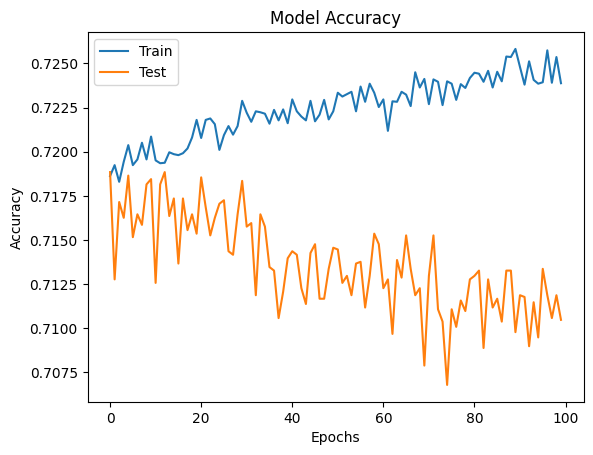

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

# Prediction


In [ ]:
import joblib
import numpy as np

# Load the saved model
model_path = '/content/drive/MyDrive/Colab Notebooks/best_xgb_model.pkl'  # Update with the correct path if necessary
scaler_path = '/content/drive/MyDrive/Colab Notebooks/scaler.pkl'
best_xgb = joblib.load(model_path)
scaler = joblib.load(scaler_path)

# Example values (you can change these values to test different inputs)
# example_values = {
#     'age': 50,  # age in years
#     'ap_hi': 110,  # systolic blood pressure
#     'ap_lo': 80,  # diastolic blood pressure
#     'cholesterol': 1,  # cholesterol level (<200)
#     'gluc': 1,  # glucose level (70-99)
#     'smoke': 0,  # smoke (0: no, 1: yes)
#     'alco': 0,  # alcohol intake (0: no, 1: yes)
#     'active': 1,  # physical activity (0: no, 1: yes)
#     'bmi': 22.0  # body mass index
# }
# no

example_values = {
    'age': 55,  # age in years
    'ap_hi': 140,  # systolic blood pressure
    'ap_lo': 90,  # diastolic blood pressure
    'cholesterol': 3,  # cholesterol level (240)
    'gluc': 1,  # glucose level (70-99)
    'smoke': 0,  # smoke (0: no, 1: yes)
    'alco': 0,  # alcohol intake (0: no, 1: yes)
    'active': 1,  # physical activity (0: no, 1: yes)
    'bmi': 34.9  # body mass index
}
# Yes

# example_values = {
#     'age': 51,  # age in years
#     'ap_hi': 130,  # systolic blood pressure
#     'ap_lo': 70,  # diastolic blood pressure
#     'cholesterol': 3,  # cholesterol level (1: normal, 2: above normal, 3: well above normal)
#     'gluc': 1,  # glucose level (1: normal, 2: above normal, 3: well above normal)
#     'smoke': 0,  # smoke (0: no, 1: yes)
#     'alco': 0,  # alcohol intake (0: no, 1: yes)
#     'active': 0,  # physical activity (0: no, 1: yes)
#     'bmi': 23.5  # body mass index
# }
# Yes

# example_values = {
#     'age': 48,  # age in years
#     'ap_hi': 150,  # systolic blood pressure
#     'ap_lo': 100,  # diastolic blood pressure
#     'cholesterol': 1,  # cholesterol level (1: normal, 2: above normal, 3: well above normal)
#     'gluc': 1,  # glucose level (1: normal, 2: above normal, 3: well above normal)
#     'smoke': 0,  # smoke (0: no, 1: yes)
#     'alco': 0,  # alcohol intake (0: no, 1: yes)
#     'active': 1,  # physical activity (0: no, 1: yes)
#     'bmi': 28.7  # body mass index
# }
# Yes

# example_values = {
#     'age': 48,  # age in years
#     'ap_hi': 180,  # systolic blood pressure
#     'ap_lo': 140,  # diastolic blood pressure
#     'cholesterol': 3,  # cholesterol level (1: normal, 2: above normal, 3: well above normal)
#     'gluc': 3,  # glucose level (130
#     'smoke': 1,  # smoke (0: no, 1: yes)
#     'alco': 1,  # alcohol intake (0: no, 1: yes)
#     'active': 0,  # physical activity (0: no, 1: yes)
#     'bmi': 40,  # body mass index
# }
# Yes

# Convert the example values to a DataFrame
input_data = pd.DataFrame([example_values])

# Normalize the input data using the loaded scaler
columns_to_normalize = ['age', 'ap_hi', 'ap_lo', 'bmi']
input_data[columns_to_normalize] = scaler.transform(input_data[columns_to_normalize])

# Convert to numpy array for prediction
input_data = input_data.values


# Predict the output
prediction = best_xgb.predict(input_data)

# Output the prediction
print("Prediction:", "Has cardiovascular disease" if prediction[0] == 1 else "No cardiovascular disease")


Prediction: No cardiovascular disease
